### CART分类树

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
features=iris.data
labels=iris.target
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.3,random_state=0)

In [31]:
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(feature_train,label_train)
label_predict=dtc.predict(feature_test)
score=accuracy_score(label_test,label_predict)
print('CART分类树准确率：%.4f'%score)

CART分类树准确率：0.9778


In [38]:
#手写数据集
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

digits=load_digits()
features=digits.data
labels=digits.target
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.3,random_state=0)
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(feature_train,label_train)
label_predict=dtc.predict(feature_test)
score=accuracy_score(label_test,label_predict)
print('CART分类树准确率：%.4f'%score)

CART分类树准确率：0.8426


### CART回归树

In [32]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

boston=load_boston()
features=boston.data
labels=boston.target
feature_train,feature_test,label_train,label_test=train_test_split(features,labels,test_size=0.3,random_state=0)

In [35]:
dtc=DecisionTreeRegressor()
dtc.fit(feature_train,label_train)
label_predict=dtc.predict(feature_test)
MAE=mean_absolute_error(label_test,label_predict)
MSE=mean_squared_error(label_test,label_predict)
print('CART回归树准确率：%.4f'%MAE);print('CART回归树准确率：%.4f'%MSE)

CART回归树准确率：3.2151
CART回归树准确率：29.4110


In [67]:
import pandas as pd
train=pd.read_csv('/Users/rickie/Desktop/Python_MachineLearning/Titanic_Data/train.csv') 
test=pd.read_csv('/Users/rickie/Desktop/Python_MachineLearning/Titanic_Data/test.csv') 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [68]:
train.head()
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [70]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [71]:
train['Embarked'].fillna('S',inplace=True)

In [72]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [110]:
features=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
train_features=train[features]
test_features=test[features]
labels=train['Survived']

In [111]:
train_features.to_dict(orient='record')

[{'Age': 22.0,
  'Embarked': 'S',
  'Fare': 7.25,
  'Parch': 0,
  'Pclass': 3,
  'Sex': 'male',
  'SibSp': 1},
 {'Age': 38.0,
  'Embarked': 'C',
  'Fare': 71.2833,
  'Parch': 0,
  'Pclass': 1,
  'Sex': 'female',
  'SibSp': 1},
 {'Age': 26.0,
  'Embarked': 'S',
  'Fare': 7.925,
  'Parch': 0,
  'Pclass': 3,
  'Sex': 'female',
  'SibSp': 0},
 {'Age': 35.0,
  'Embarked': 'S',
  'Fare': 53.1,
  'Parch': 0,
  'Pclass': 1,
  'Sex': 'female',
  'SibSp': 1},
 {'Age': 35.0,
  'Embarked': 'S',
  'Fare': 8.05,
  'Parch': 0,
  'Pclass': 3,
  'Sex': 'male',
  'SibSp': 0},
 {'Age': 29.69911764705882,
  'Embarked': 'Q',
  'Fare': 8.4583,
  'Parch': 0,
  'Pclass': 3,
  'Sex': 'male',
  'SibSp': 0},
 {'Age': 54.0,
  'Embarked': 'S',
  'Fare': 51.8625,
  'Parch': 0,
  'Pclass': 1,
  'Sex': 'male',
  'SibSp': 0},
 {'Age': 2.0,
  'Embarked': 'S',
  'Fare': 21.075,
  'Parch': 1,
  'Pclass': 3,
  'Sex': 'male',
  'SibSp': 3},
 {'Age': 27.0,
  'Embarked': 'S',
  'Fare': 11.1333,
  'Parch': 2,
  'Pclass': 3,
 

In [112]:
from sklearn.feature_extraction import DictVectorizer
dvec=DictVectorizer(sparse=False)
train_features=dvec.fit_transform(train_features.to_dict(orient='record'))

In [114]:
dvec.get_feature_names()

['Age',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex=female',
 'Sex=male',
 'SibSp']

In [115]:
import numpy as np
np.shape(train_features)

(891, 10)

In [116]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_features,labels)
test_features=dvec.fit_transform(test_features.to_dict(orient='record'))
test_pred=dtc.predict(test_features)


In [117]:
acc=dtc.score(train_features,labels)
print('模型准确率：%.6f'%acc)

模型准确率：0.982043


In [118]:
import numpy as np
from sklearn.model_selection import cross_val_score,cross_val_predict
# 使用 K 折交叉验证 统计决策树准确率
cross_score=cross_val_score(dtc, train_features, labels, cv=10)
print(u'cross_val_score 准确率为 %.6lf' % np.mean(cross_score))


cross_val_score 准确率为 0.780208


## Naive Bayes

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer()
documents = [
    'this is the bayes document',
    'this is the second second document',
    'and the third one',
    'is this the document'
]
tfidf_matrix = tfidf_vec.fit_transform(documents)

In [126]:
tfidf_vec.get_feature_names()
# tfidf_vec.vocabulary_

['and', 'bayes', 'document', 'is', 'one', 'second', 'the', 'third', 'this']

In [19]:
print(tfidf_matrix)

  (0, 8)	0.404128947133
  (0, 3)	0.404128947133
  (0, 6)	0.330401894936
  (0, 1)	0.633146089059
  (0, 2)	0.404128947133
  (1, 8)	0.272301467523
  (1, 3)	0.272301467523
  (1, 6)	0.222624292325
  (1, 2)	0.272301467523
  (1, 5)	0.853225736145
  (2, 6)	0.28847674875
  (2, 0)	0.552805319991
  (2, 7)	0.552805319991
  (2, 4)	0.552805319991
  (3, 8)	0.522108621994
  (3, 3)	0.522108621994
  (3, 6)	0.426858009784
  (3, 2)	0.522108621994


In [20]:
tfidf_matrix.toarray()#根据id排列的

array([[ 0.        ,  0.63314609,  0.40412895,  0.40412895,  0.        ,
         0.        ,  0.33040189,  0.        ,  0.40412895],
       [ 0.        ,  0.        ,  0.27230147,  0.27230147,  0.        ,
         0.85322574,  0.22262429,  0.        ,  0.27230147],
       [ 0.55280532,  0.        ,  0.        ,  0.        ,  0.55280532,
         0.        ,  0.28847675,  0.55280532,  0.        ],
       [ 0.        ,  0.        ,  0.52210862,  0.52210862,  0.        ,
         0.        ,  0.42685801,  0.        ,  0.52210862]])

In [46]:
import nltk
word_list=nltk.word_tokenize('i\'ve eaten an apple.')

In [47]:
word_list

['i', "'ve", 'eaten', 'an', 'apple', '.']

In [182]:
import jieba
import pandas as pd
text=[]
word_list=[]
for theme in ['女性','体育','文学','校园']:
    for i in range(1,10):
        f=open(r'/Users/rickie/Desktop/Data_Analysis_YangC/text_classification-master/text classification/train/'+theme+'/'+str(i)+'.txt',
                  encoding='gbk')
        line=f.read()
        fenci=jieba.cut(line)
        word_str='/'.join(fenci)
        word_list.append(word_str)

# fenci=jieba.cut(string)
# word_list='/'.join(list(fenci))#显示分词结果,为str
train_contents=word_list

In [183]:
stop_words = [line.strip().encode('utf-8').decode('utf-8') for line in open('/Users/rickie/Desktop/Data_Analysis_YangC/text_classification-master/text classification/stop/stopword.txt').readlines()]

In [184]:
tf = TfidfVectorizer(stop_words=stop_words, max_df=0.5)
train_features = tf.fit_transform(train_contents)
# tf.get_feature_names()
np.shape(train_features)
train_vocabulary=tf.vocabulary_

In [185]:
import numpy as np
train_labels=np.array(['女性']*9+['体育']*9+['文学']*9+['校园']*9)

In [186]:
# 多项式贝叶斯分类器
from sklearn.naive_bayes import MultinomialNB  
clf = MultinomialNB(alpha=0.001).fit(train_features, train_labels)

In [207]:
#训练集
text=[]
word_list=[]
for theme in ['女性','体育','文学','校园']:
    for i in range(60,65):
        f=open(r'/Users/rickie/Desktop/Data_Analysis_YangC/text_classification-master/text classification/train/'+theme+'/'+str(i)+'.txt',
                  encoding='gbk')
        line=f.read()
        fenci=jieba.cut(line)
        word_str='/'.join(fenci)
        word_list.append(word_str)
test_contents=word_list
test_labels=np.array(['女性']*5+['体育']*5+['文学']*5+['校园']*5)

In [208]:
test_tf = TfidfVectorizer(stop_words=stop_words, max_df=0.5, vocabulary=train_vocabulary)
test_features=test_tf.fit_transform(test_contents)
predicted_labels=clf.predict(test_features)

In [209]:
from sklearn import metrics
print(metrics.accuracy_score(test_labels, predicted_labels))

0.65


### SVM

In [226]:
from sklearn import svm
import pandas as pd
data=pd.read_csv('/Users/rickie/Desktop/breast_cancer_data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [230]:
# data.drop('id',axis=1,inplace=True)
# data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
pd.set_option('display.max_columns',None)
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


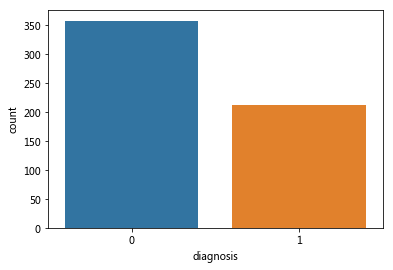

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data.diagnosis)
plt.show()

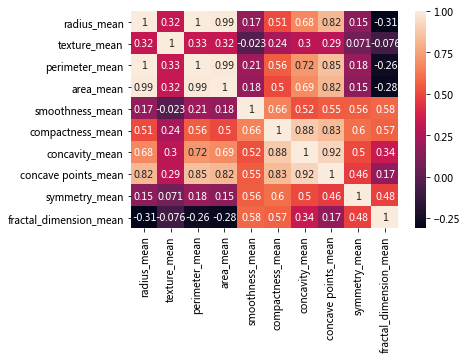

In [238]:
features_mean=list(data.columns[1:11])
corr=data[features_mean].corr()
sns.heatmap(corr,annot=True)
plt.show()

In [239]:
# 特征选择
features_remain = ['radius_mean','texture_mean', 'smoothness_mean','compactness_mean','symmetry_mean', 'fractal_dimension_mean'] 

In [241]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3)

In [247]:
train_X=train[features_remain]
train_y=train['diagnosis']
test_X=test[features_remain]
test_y=test['diagnosis']

In [248]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_X=ss.fit_transform(train_X)
test_X=ss.fit_transform(test_X)


In [249]:
model=svm.SVC()
model.fit(train_X,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [250]:
prediction=model.predict(test_X)
from sklearn.metrics import accuracy_score
print('准确率：%.4f'%accuracy_score(prediction,test_y))

准确率：0.9598


In [259]:
#使用全部数据
from sklearn import svm
import pandas as pd
data1=pd.read_csv('/Users/rickie/Desktop/breast_cancer_data/data.csv')
data1.drop('id',axis=1,inplace=True)
data1['diagnosis']=data1['diagnosis'].map({'M':1,'B':0})
data1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [266]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3)
train_X=train.iloc[:,1:]

train_y=train['diagnosis']
test_X=test.iloc[:,1:]
test_y=test['diagnosis']
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_X=ss.fit_transform(train_X)
test_X=ss.transform(test_X)
model=svm.SVC()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
from sklearn.metrics import accuracy_score
print('准确率：%.4f'%accuracy_score(prediction,test_y))

准确率：0.9766


### KNN

In [298]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB

In [299]:
digits=load_digits()
data=digits.data
print(data.shape)
print(digits.images[0])
print(digits.target[0])

(1797, 64)
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
0


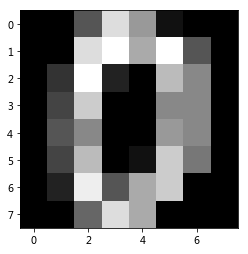

In [300]:
plt.gray()
plt.imshow(digits.images[0])

In [307]:
train_x,test_x,train_y,test_y=train_test_split(data,digits.target,test_size=0.3)

In [308]:
ss=StandardScaler()
train_ss_x=ss.fit_transform(train_x)
test_ss_x=ss.transform(test_x)


In [309]:
knn=KNeighborsClassifier()

knn.fit(train_ss_x,train_y)
prediction=knn.predict(test_ss_x)
print('KNN 准确率：%.4f'% accuracy_score(prediction,test_y))

KNN 准确率：0.9778


In [310]:
# NB不能有负值输入
mm=MinMaxScaler()
train_mm_x=mm.fit_transform(train_x)
test_mm_x=mm.transform(test_x)


In [312]:
mnb=MultinomialNB()
mnb.fit(train_mm_x,train_y)
prediction1=mnb.predict(test_mm_x)
print('Multi-NB 准确率：%.4f'% accuracy_score(prediction1,test_y))

Multi-NB 准确率：0.8926


## K-means

In [351]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [352]:
data=pd.read_csv('/Users/rickie/Desktop/Data_Analysis_YangC/kmeans/data.csv',encoding='gbk')
data

,国家,2019年国际排名,2018世界杯,2015亚洲杯
0,中国,73,40,7
1,日本,60,15,5
2,韩国,61,19,2
3,伊朗,34,18,6
4,沙特,67,26,10
5,伊拉克,91,40,4
6,卡塔尔,101,40,13
7,阿联酋,81,40,6
8,乌兹别克斯坦,88,40,8
9,泰国,122,40,17


In [357]:
train_x=data.iloc[:,1:]
mm=MinMaxScaler()
train_x=mm.fit_transform(train_x)
train_x

array([[ 0.3       ,  0.71428571,  0.375     ],
       [ 0.2       ,  0.        ,  0.25      ],
       [ 0.20769231,  0.11428571,  0.0625    ],
       [ 0.        ,  0.08571429,  0.3125    ],
       [ 0.25384615,  0.31428571,  0.5625    ],
       [ 0.43846154,  0.71428571,  0.1875    ],
       [ 0.51538462,  0.71428571,  0.75      ],
       [ 0.36153846,  0.71428571,  0.3125    ],
       [ 0.41538462,  0.71428571,  0.4375    ],
       [ 0.67692308,  0.71428571,  1.        ],
       [ 0.52307692,  1.        ,  1.        ],
       [ 0.40769231,  1.        ,  0.6875    ],
       [ 0.63076923,  1.        ,  0.625     ],
       [ 0.58461538,  1.        ,  0.8125    ],
       [ 1.        ,  1.        ,  1.        ],
       [ 0.04615385,  0.42857143,  0.        ],
       [ 0.32307692,  0.71428571,  1.        ],
       [ 0.64615385,  1.        ,  0.5       ],
       [ 0.96923077,  1.        ,  0.875     ],
       [ 0.47692308,  1.        ,  0.9375    ]])

In [358]:
kmeans=KMeans(n_clusters=3)
predict_y=kmeans.fit_predict(train_x)

In [359]:
result=pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result=result.rename(columns={0:u'聚类'})
result

,国家,2019年国际排名,2018世界杯,2015亚洲杯,聚类
0,中国,73,40,7,0
1,日本,60,15,5,2
2,韩国,61,19,2,2
3,伊朗,34,18,6,2
4,沙特,67,26,10,2
5,伊拉克,91,40,4,0
6,卡塔尔,101,40,13,1
7,阿联酋,81,40,6,0
8,乌兹别克斯坦,88,40,8,0
9,泰国,122,40,17,1


### K means实战：图像聚类

In [22]:
import PIL.Image as image
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [51]:
def load_data(filePath):
    f=open(filePath,'rb')
    data=[]
    img=image.open(f)
    width,height=img.size
    for x in range(width):
        for y in range(height):
            c1,c2,c3=img.getpixel((x,y))
            data.append([c1,c2,c3])
    f.close()
    mm=MinMaxScaler()
    mm.fit_transform(data)
    return np.matrix(data),width,height
data,width,height=load_data('/Users/rickie/Desktop/Data_Analysis_YangC/kmeans/weixin.jpg')

In [52]:
km=KMeans(n_clusters=2)
label=km.fit_predict(data)
label=label.reshape([width,height])

In [53]:
pic_mark=image.new('L',(width,height))
for x in range(width):
    for y in range(height):
        pic_mark.putpixel((x,y),int(256/(label[x][y]+1))-1)
        pic_mark.size=width,height
pic_mark.save('/Users/rickie/Desktop/Data_Analysis_YangC/kmeans/weixin_mark.jpg','jpeg')

#method 2
from skimage import color
# 将聚类标识矩阵转化为不同颜色的矩阵
label_color = (color.label2rgb(label)*255).astype(np.uint8)
label_color = label_color.transpose(1,0,2)
images = image.fromarray(label_color)
images.save('/Users/rickie/Desktop/Data_Analysis_YangC/kmeans/weixin_mark_1.jpg')




In [56]:
# 16种颜色的聚类
def load_data(filePath):
    f=open(filePath,'rb')
    data=[]
    img=image.open(f)
    width,height=img.size
    for x in range(width):
        for y in range(height):
            c1,c2,c3=img.getpixel((x,y))
            data.append([(c1+1)/256,(c2+1)/256,(c3+1)/256])# 标准化
    f.close()
    return np.matrix(data),width,height
data,width,height=load_data('/Users/rickie/Desktop/Data_Analysis_YangC/kmeans/weixin.jpg')

km=KMeans(n_clusters=10)
label=km.fit_predict(data)
label=label.reshape([width,height])

from skimage import color
# 将聚类标识矩阵转化为不同颜色的矩阵
label_color = (color.label2rgb(label)*255).astype(np.uint8)
label_color = label_color.transpose(1,0,2)
images = image.fromarray(label_color)
images.save('/Users/rickie/Desktop/Data_Analysis_YangC/kmeans/weixin_mark_color.jpg')

## 还原
pic_mark=image.new('RGB',(width,height))
for x in range(width):
    for y in range(height):
        c1 = km.cluster_centers_[label[x, y], 0]
        c2 = km.cluster_centers_[label[x, y], 1]
        c3 = km.cluster_centers_[label[x, y], 2]
        
        pic_mark.putpixel((x,y),(int(c1*256)-1,int(c2*256)-1,int(c3*256)-1))
        pic_mark.size=width,height
pic_mark.save('/Users/rickie/Desktop/Data_Analysis_YangC/kmeans/weixin_mark_color_reverse.jpg','jpeg')




## 关联挖掘

In [65]:
from efficient_apriori import apriori
# 设置数据集
data = [('牛奶','面包','尿布'),
           ('可乐','面包', '尿布', '啤酒'),
           ('牛奶','尿布', '啤酒', '鸡蛋'),
           ('面包', '牛奶', '尿布', '啤酒'),
           ('面包', '牛奶', '尿布', '可乐')]
# 挖掘频繁项集和频繁规则
itemsets, rules = apriori(data, min_support=0.5,  min_confidence=1)
print(itemsets)
print(rules)


{1: {('啤酒',): 3, ('尿布',): 5, ('牛奶',): 4, ('面包',): 4}, 2: {('啤酒', '尿布'): 3, ('尿布', '牛奶'): 4, ('尿布', '面包'): 4, ('牛奶', '面包'): 3}, 3: {('尿布', '牛奶', '面包'): 3}}
[{啤酒} -> {尿布}, {牛奶} -> {尿布}, {面包} -> {尿布}, {牛奶, 面包} -> {尿布}]


In [72]:
# -*- coding: utf-8 -*-
import csv
director=u'宁浩'
file_name='./Desktop/Data_Analysis_YangC/'+director+'.csv'
base_url='https://movie.douban.com/subject_search?search_text='+director+'&cat=1002&start='
out = open(file_name,'w', newline='', encoding='utf-8-sig')
csv_write = csv.writer(out, dialect='excel')


In [73]:
from selenium import webdriver
import time
from lxml import etree
driver=webdriver.Chrome()

def download(requested_url):
    driver.get(requested_url)
    time.sleep(1)
    html=driver.find_element_by_xpath('//*').get_attribute('outerHTML')
    html=etree.HTML(html)
    movie_lists=html.xpath("/html/body/div[@id='wrapper']/div[@id='root']/div[1]//div[@class='item-root']/div[@class='detail']/div[@class='title']/a[@class='title-text']")
    name_lists=html.xpath("/html/body/div[@id='wrapper']/div[@id='root']/div[1]//div[@class='item-root']/div[@class='detail']/div[@class='meta abstract_2']")
    num=len(movie_lists)
    
    if num > 15: # 第一页会有 16 条数据
           # 默认第一个不是，所以需要去掉
           movie_lists = movie_lists[1:]
           name_lists = name_lists[1:]
    for (movie, name_list) in zip(movie_lists, name_lists):
           # 会存在数据为空的情况
           if name_list.text is None: 
                continue
           # 显示下演员名称
           print(name_list.text)
           names = name_list.text.split('/')
           # 判断导演是否为指定的 director
           if names[0].strip() == director:
                # 将第一个字段设置为电影名称
                names[0] = movie.text
                csv_write.writerow(names)
    print('OK') # 代表这页数据下载成功
    if num >= 15:
           # 继续下一页
        return True
    else:
           # 没有下一页
        return False

In [74]:
start=0
while start<=10000:
    requested_url=base_url+str(start)
    page=download(requested_url)
    if page:
        start+=15
    else:
        break
out.close()
print('finished')
    

郭帆 / 屈楚萧 / 吴京 / 李光洁 / 吴孟达 / 赵今麦 / 隋凯 / 屈菁菁 / 张亦驰
宁浩 / 黄渤 / 沈腾 / 汤姆·派福瑞 / 马修·莫里森 / 徐峥 / 于和伟 / 雷佳音 / 刘桦
文牧野 / 徐峥 / 王传君 / 周一围 / 谭卓 / 章宇 / 杨新鸣 / 王佳佳 / 王砚辉
黄渤 / 舒淇 / 王宝强 / 张艺兴 / 于和伟 / 王迅 / 李勤勤 / 李又麟
宁浩 / 郭涛 / 刘桦 / 连晋 / 黄渤 / 徐峥 / 优恵 / 罗兰  / 王迅
宁浩 / 黄渤 / 戎祥 / 九孔 / 徐峥 / 王双宝 / 巴多 / 董立范 / 高捷
宁浩 / 徐峥 / 黄渤 / 余男 / 多布杰 / 王双宝 / 巴多 / 杨新鸣 / 郭虹
管虎 / 冯小刚 / 许晴 / 张涵予 / 刘桦 / 李易峰 / 吴亦凡 / 梁静 / 白举纲
宁浩 / 黄渤 / 徐峥 / 袁泉 / 周冬雨 / 陶慧 / 岳小军 / 沈腾 / 张俪
许鞍华 / 叶德娴 / 刘德华 / 秦海璐 / 秦沛 / 黄秋生 / 王馥荔 / 朱慧敏 / 江美仪
宁浩 / 雷佳音 / 陶虹 / 程媛媛 / 山崎敬一 / 郭涛 / 范伟 / 孙淳 / 刘桦
张一白 / 李亚鹏 / 徐静蕾 / 王学兵 / 何洁 / 程伊 / 崔达治 / 优恵 / 陈明
丁晟 / 王凯 / 马天宇 / 王大陆 / 余皑磊 / 林雪 / 吴樾 / 李梦 / 张艺上
宁浩 / 李强
黄渤 / 舒淇 / 王宝强 / 张艺兴 / 于和伟 / 王迅 / 李勤勤 / 李又麟
OK
毕蜂 / 窦文涛 / 梁文道 / 许子东 / 马家辉 / 竹幼婷 / 查建英 / 周轶君 / 林玮婕
乌尔善 / 安藤政信 / 张雨绮 / 游本昌 / 刘晓晔 / 徐冲 / 韩鹏翼 / 刘桦 / 宁浩
宁浩 / 张曦 / 黄渤 / 王玮 / 聂鑫 / 王迅 / 岳小军
宁浩 / 巴德玛
秦海睿 / 王自健 / 中孝介 / 宁浩 / 李东学 / 黄龄 / 宋丹丹 / 王雷 / 范明
钟澍佳 / 杜淳 / 马苏 / 李若嘉 / 武强 / 王德顺 / 李亚天 / 谢园 / 张殿伦
宁浩
何澍培 / 何晟铭 / 蒋梦婕 / 高洋 / 吕佳容 / 王琳 / 汤镇业 / 汤镇宗 / 吴岱融
谢晋 / 陈凯歌 / 关锦鹏 / 侯咏 / 陆川 / 宁浩 / 张一白 / 

In [ ]:
# -*- coding: utf-8 -*-
from efficient_apriori import apriori
from lxml import etree
import time
from selenium import webdriver
import csv
driver = webdriver.Chrome()

# 下载指定页面的数据
def download(request_url):
     driver.get(request_url)
     time.sleep(1)
     html = driver.find_element_by_xpath("//*").get_attribute("outerHTML")
     html = etree.HTML(html)
     # 设置电影名称，导演演员 的 XPATH
     movie_lists = html.xpath("/html/body/div[@id='wrapper']/div[@id='root']/div[1]//div[@class='item-root']/div[@class='detail']/div[@class='title']/a[@class='title-text']")
     name_lists = html.xpath("/html/body/div[@id='wrapper']/div[@id='root']/div[1]//div[@class='item-root']/div[@class='detail']/div[@class='meta abstract_2']")
     # 获取返回的数据个数
     num = len(movie_lists)
     if num > 15: # 第一页会有 16 条数据
           # 默认第一个不是，所以需要去掉
           movie_lists = movie_lists[1:]
           name_lists = name_lists[1:]
     for (movie, name_list) in zip(movie_lists, name_lists):
           # 会存在数据为空的情况
           if name_list.text is None: 
                continue
           # 显示下演员名称
           print(name_list.text)
           names = name_list.text.split('/')
           # 判断导演是否为指定的 director
           if names[0].strip() == director:
                # 将第一个字段设置为电影名称
                names[0] = movie.text
                csv_write.writerow(names)
     print('OK') # 代表这页数据下载成功
     if num >= 15:
           # 继续下一页
           return True
     else:
           # 没有下一页
           return False
 
# 开始的 ID 为 0，每页增加 15
start = 0
while start<10000: # 最多抽取 1 万部电影
     request_url = base_url + str(start)
     # 下载数据，并返回是否有下一页
     flag = download(request_url)
     if flag:
           start = start + 15
     else:
           break
out.close()
print('finished')


In [78]:
from efficient_apriori import apriori
import csv
director=u'宁浩'
file_name='./Desktop/Data_Analysis_YangC/'+director+'.csv'
lists=csv.reader(open(file_name,'r',encoding='utf-8-sig'))
data=[]
for names in lists:
    names_new=[]
    for name in names:
        names_new.append(name.strip())
    data.append(names_new[1:])
data
itemsets,rules=apriori(data,min_support=0.5,min_confidence=1)
itemsets,rules
    

({1: {('徐峥',): 5, ('黄渤',): 6}, 2: {('徐峥', '黄渤'): 5}}, [{徐峥} -> {黄渤}])

In [ ]:
/html/body/div[@id='wrapper']/div[@id='root']//div[1]/div[@class='sc-bZQynM cqeAaa sc-bxivhb hRIaFd'][1]/div[@class='item-root']/div[@class='detail']/div[@class='title']/a[@class='title-text']

## pagerank

In [125]:
import pandas as pd
import networkx as nx
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

In [126]:
emails=pd.read_csv('/Users/rickie/Desktop/Data_Analysis_YangC/PageRank-master/input/Emails.csv')
files=pd.read_csv('/Users/rickie/Desktop/Data_Analysis_YangC/PageRank-master/input/Aliases.csv')
Aliases={}
for index,row in files.iterrows():
    Aliases[row['Alias']]=row['PersonId']
files=pd.read_csv('/Users/rickie/Desktop/Data_Analysis_YangC/PageRank-master/input/Persons.csv')
Persons={}
for index,row in files.iterrows():
    Persons[row['Id']]=row['Name']
emails.MetadataFrom[0]

'Sullivan, Jacob J'

In [127]:
def unify_name(name):
    name=str(name).lower()    
    name=name.replace(","," ").split('@')[0]
    if name in Aliases.keys():
        return Persons[Aliases[name]]
    
    return name

In [128]:

emails.MetadataFrom=emails.MetadataFrom.apply(unify_name)
emails.MetadataTo=emails.MetadataTo.apply(unify_name)
emails.MetadataFrom


0           sullivan  jacob j
1                         nan
2             mills  cheryl d
3             mills  cheryl d
4             Hillary Clinton
5             Hillary Clinton
6             mills  cheryl d
7             Hillary Clinton
8           sullivan  jacob j
9                         nan
10          sullivan  jacob j
11                        nan
12          sullivan  jacob j
13      slaughter  anne-marie
14            mills  cheryl d
15         koh  harold hongju
16           sherman  wendy r
17           sherman  wendy r
18          sullivan  jacob j
19          sullivan  jacob j
20            Hillary Clinton
21            Hillary Clinton
22            Hillary Clinton
23            Hillary Clinton
24          sullivan  jacob j
25         blumenthal  sidney
26          sullivan  jacob j
27            mills  cheryl d
28             strider  burns
29               abedin  huma
                ...          
7915        Sidney Blumenthal
7916        sullivan  jacob j
7917      

In [129]:
edges_weight_temp=defaultdict(list)
for row in zip(emails.MetadataFrom,emails.MetadataTo):
    temp=(row[0],row[1])
    if temp not in edges_weight_temp:
        edges_weight_temp[temp]=1
    else:
        edges_weight_temp[temp]=edges_weight_temp[temp]+1
edges_weights=[(key[0],key[1],val) for key,val in edges_weight_temp.items()]        
        

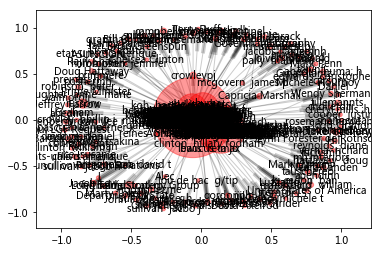

In [130]:

def show_graph(graph):
    # 使用 Spring Layout 布局，类似中心放射状
    positions=nx.spring_layout(graph)
    
    nodesize = [x['pagerank']*20000 for v,x in graph.nodes(data=True)] #dict格式  
    edgesize = [np.sqrt(e[2]['weight']) for e in graph.edges(data=True)] #dict格式
    nx.draw_networkx_nodes(graph, positions, node_size=nodesize, alpha=0.4)
    nx.draw_networkx_edges(graph, positions, edge_size=edgesize, alpha=0.2)
    nx.draw_networkx_labels(graph, positions, font_size=10)
    plt.show()
    
graph = nx.DiGraph()
graph.add_weighted_edges_from(edges_weights)
pagerank = nx.pagerank(graph)
pagerank_list = {node: rank for node, rank in pagerank.items()}

# 将 pagerank 数值作为节点的属性
nx.set_node_attributes(graph, name = 'pagerank', values=pagerank_list)
# 画网络图
show_graph(graph)


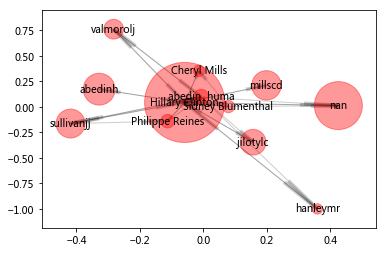

In [131]:

# 将完整的图谱进行精简
# 设置 PR 值的阈值，筛选大于阈值的重要核心节点
pagerank_threshold = 0.005
# 复制一份计算好的网络图
small_graph = graph.copy()
# 剪掉 PR 值小于 pagerank_threshold 的节点
for n, p_rank in graph.nodes(data=True):
    if p_rank['pagerank'] < pagerank_threshold: 
        small_graph.remove_node(n)
# 画网络图
show_graph(small_graph)


/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


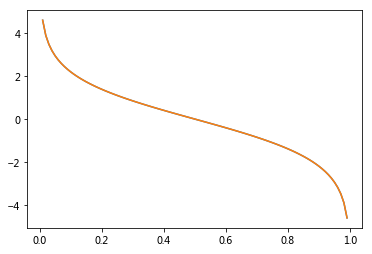

In [136]:
x=np.arange(0,1,0.01)
plt.plot(x,np.log((1-x)/x))
plt.show()

2.3025850929940459